In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import xarray.ufuncs as xu
import matplotlib.pyplot as plt
%matplotlib inline
import cmocean as cm
import dask.array as da
import scipy.io
from scipy import signal
import os
from dask.distributed import Client
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 16,Total memory: 63.20 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:53163,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 16
Started: Just now,Total memory: 63.20 GiB
Comm: tcp://127.0.0.1:53199,Total threads: 4
Dashboard: http://127.0.0.1:53200/status,Memory: 15.80 GiB
Nanny: tcp://127.0.0.1:53168,


In [2]:
os.getcwd()

'C:\\Users\\tthompson\\Documents\\Projects\\Estaury-Salt_Front\\fetch\\drb-estuary-salinity-ml'

Load Distance Miles, Convert to CSV

In [3]:
import scipy.io
mat = scipy.io.loadmat('alongshore_mi_lonlat_distmile_ALL.mat',struct_as_record=False,squeeze_me=True)

In [4]:
model_i = mat['model_i']-1
model_j = mat['model_j']-1
rm_lat = mat['model_lat']
rm_lon = mat['model_lon']
dist_mile =mat['dist_mile']

In [227]:
rm_df = pd.DataFrame(mat, columns=['dist_mile', 'model_i', 'model_j', 'model_lat', 'model_lon']) #create dataframe for iloc capability

In [228]:
rm_df.to_csv('river_mile_coords.csv')

In [6]:
array = ([[dist_mile[61], model_i[61], model_j[61],rm_lon[61],rm_lat[61]],
        [dist_mile[111], model_i[111], model_j[111], rm_lon[111],rm_lat[111]],
        [dist_mile[161], model_i[161], model_j[161], rm_lon[161],rm_lat[161]],
        [dist_mile[216], model_i[216], model_j[216], rm_lon[216],rm_lat[216]],
        [dist_mile[308], model_i[308], model_j[308], rm_lon[308],rm_lat[308]],
        [dist_mile[414], model_i[414], model_j[414], rm_lon[414],rm_lat[414]],
        [dist_mile[486], model_i[486], model_j[486], rm_lon[486],rm_lat[486]],
        [dist_mile[558], model_i[558], model_j[558], rm_lon[558],rm_lat[558]],
        [dist_mile[711], model_i[711], model_j[711], rm_lon[711],rm_lat[711]],
        [dist_mile[877], model_i[877], model_j[877], rm_lon[877],rm_lat[877]],
        [dist_mile[977], model_i[977], model_j[977], rm_lon[977],rm_lat[977]],
        [dist_mile[1095], model_i[1095], model_j[1095], rm_lon[1095],rm_lat[1095]],
        [dist_mile[1210], model_i[1210], model_j[1210], rm_lon[1210],rm_lat[1210]]])
rm_df = pd.DataFrame(array, 
                     index = ['river_mile_1', 'river_mile_10', 'river_mile_20', 'river_mile_30', 'river_mile_40', 'river_mile_50', 'river_mile_60', 'river_mile_70', 'river_mile_80', 'river_mile_90', 'river_mile_100', 'river_mile_110', 'river_mile_120'],
                              columns=['dist_mile', 'model_i', 'model_j', 'model_lat', 'model_lon'])
rm_df

,dist_mile,model_i,model_j,model_lat,model_lon
river_mile_1,0.137343,65,61,-75.057375,38.844426
river_mile_10,10.061386,80,111,-75.130076,38.980740
river_mile_20,19.991430,96,161,-75.211898,39.112142
river_mile_30,30.051648,104,216,-75.294151,39.219372
river_mile_40,39.974993,93,308,-75.421832,39.335900
river_mile_50,50.037004,48,414,-75.550294,39.444289
river_mile_60,59.974100,55,486,-75.557534,39.583847
river_mile_70,69.947750,57,558,-75.510660,39.704225
river_mile_80,80.024129,58,711,-75.396762,39.813707
river_mile_90,89.992165,71,877,-75.230973,39.859903


In [7]:
rm_df.to_csv(path_or_buf='river_mile_coords.csv', columns =['dist_mile', 'model_i', 'model_j', 'model_lat', 'model_lon'], 
             header=True, index=True)

Load Station List

In [5]:
station_list = scipy.io.loadmat('station_list_v2.mat',struct_as_record=False,squeeze_me=True)

In [6]:
sl_df = pd.DataFrame(station_list, 
                     index = ['Newbold','Burlington','Bridesburg','Philadelphia', 'Marcus_Hook','Delaware_City','Reedy_Point','Ship_John_Shoal','Brandywine_Shoal_Light','Cape_May_NOAA','Lewes','Trenton','Trenton_Marine_Terminal','Pennypack_Creek','Riverton','Ben_Franklin_Bridge','Schuykill_River','Fort_Mifflin','Chester','Delaware_River_At_Memorial_Bridge','C&D_Canal','Reedy_Island','Reedy_Island_Jetty','Cape_May_USGS'],
                     columns=['lat', 'lon', 'mi', 'mj', 'station_ID', 'station_agency'])
sl_df

,lat,lon,mi,mj,station_ID,station_agency
Newbold,40.136667,74.751667,103,1277,8548989,NOAA
Burlington,40.080000,74.873333,75,1184,8539094,NOAA
Bridesburg,39.983333,75.075000,64,1039,8546252,NOAA
Philadelphia,39.933333,75.141667,47,987,8545240,NOAA
Marcus_Hook,39.811667,75.410000,45,701,8540433,NOAA
Delaware_City,39.581667,75.588333,30,485,8551762,NOAA
Reedy_Point,39.558333,75.573333,44,476,8551910,NOAA
Ship_John_Shoal,39.305000,75.375000,105,277,8537121,NOAA
Brandywine_Shoal_Light,38.986667,75.113333,86,110,8555889,NOAA
Cape_May_NOAA,38.968333,74.960000,110,78,8536110,NOAA


In [10]:
sl_df.to_csv(path_or_buf='station_list_coords.csv', columns =['lat', 'lon', 'mi', 'mj', 'station_ID', 'station_agency'], 
             header=True, index=True)

# Scripts

In [ ]:
def load_COAWST_model_run(url):
    ds = xr.open_dataset(url, chunks={'ocean_time':720})
    ds = xr.Dataset(ds, coords={'lon': (['eta_rho', 'xi_rho'], nc['lon_rho']),
                          'lat': (['eta_rho', 'xi_rho'], nc['lat_rho']),
                          's': nc['s_rho'])
    print(f'Size: {ds.nbytes / (-10**9)} GB')
    print(run_number)
    return ds

In [ ]:
def river_mile_timeseries(write_location, s3_client, s3_bucket, run_number):
    # read river mile coordinates csv
    river_mile_coords = pd.read_csv(river_mile_coords_filepath, index_col=0)
    
    # create array of river miles as points
    target_x = np.array(river_mile_coords.iloc[:,[1]].values).squeeze()
    target_x = xr.DataArray(target_x,dims=["points"]) 
    target_y = np.array(river_mile_coords.iloc[:,[2]].values).squeeze()
    target_y = xr.DataArray(target_y,dims=["points"]) 
    dist_mile = np.array(river_mile_coords.iloc[:,[0]].values).squeeze()
    dist_mile = xr.DataArray(dist_mile,dims=["points"]) 
    
    # select variable for timeseries along shore
    ds = ds.isel(xi_rho=target_x,eta_rho=target_y) 
    
    # assign river mile distance as a new coordinate in dataset
    ds = ds.assign_coords({'dist_mile': dist_mile})
    
    # sort by river mile, subset values from 1st river mile
    salt = ds.isel(s_rho=0).sortby(ds.dist_mile)
    
    #locate saltfront
    saltfront = salt.where(salt < 0.52).where(salt > 0.5)
    saltfront_location = saltfront.where(saltfront.max('ocean_time'))
    
    # convert Datarray to dataframe
    saltfront_location= saltfront_location.to_dataframe()
    
    # tidy dataframe
    df = saltfront_location[saltfront_location['salt'].notna()]
    df = df.droplevel(level=1)
    
    # take daily average
    df = df.resample('1D').mean()
    
    saltfront_data = os.path.join('.', '01_fetch', 'out', f'salt_front_location_from_COAWST_run_{run_number}.csv')
    df.to_csv(saltfront_data, index=False)
    # upload csv with salt front data to S3
        if write_location == 'S3':
        print('uploading to s3')
        s3_client.upload_file(saltfront_data, s3_bucket, '01_fetch/out/'+os.path.basename(saltfront_data))
    # if write_location == 'S3':
    #     try: 
    #         s3.Object(s3_bucket, netcdf_path).load()
    #     except botocore.exceptions.ClientError as e:
    #         if e.response['Error']['Code'] == "404":
    #             salt.to_netcdf(netcdf_path)
    #             print('uploading to s3')
    #             s3_client.upload_file(s3_bucket, '01_fetch/out/' + netcdf_filename)
    # else:
    #     if os.path.isfile(netcdf_path):
    #         print ("File exist")
    #     else:
    #     salt.to_netcdf(netcdf_path)
        
    # close original salt dataset; improves performance

In [ ]:
def main():
    # import config
    with open("01_fetch/fetch_config.yaml", 'r') as stream:
        config = yaml.safe_load(stream)['fetch_COAWST_model_run.py']
        
    # set up write location data outputs
    write_location = config['write_location']
    s3_client = utils.prep_write_location(write_location, config['aws_profile'])
    s3_bucket = config['s3_bucket']
    
    # define model run
    url = config['url']
    u = url.split('/')
    run_number = u[12]
    
    # define csv with river mile coordinates
    river_mile_coords_filepath = config['river_mile_coords_filepath']
if __name__ == '__main__':
    main()

In [44]:
river_mile_coords

,dist_mile,model_i,model_j,model_lat,model_lon
river_mile_1,0.137343,65,61,-75.057375,38.844426
river_mile_10,10.061386,80,111,-75.130076,38.980740
river_mile_20,19.991430,96,161,-75.211898,39.112142
river_mile_30,30.051648,104,216,-75.294151,39.219372
river_mile_40,39.974993,93,308,-75.421832,39.335900
river_mile_50,50.037004,48,414,-75.550294,39.444289
river_mile_60,59.974100,55,486,-75.557534,39.583847
river_mile_70,69.947750,57,558,-75.510660,39.704225
river_mile_80,80.024129,58,711,-75.396762,39.813707
river_mile_90,89.992165,71,877,-75.230973,39.859903


In [289]:
river_mile_coords = pd.read_csv('01_fetch/src/river_mile_coords.csv', index_col=0 )
target_x = np.array(river_mile_coords.iloc[:,[1]].values).squeeze()
target_x = xr.DataArray(target_x, dims=["dist_miles"]) 
target_y = np.array(river_mile_coords.iloc[:,[2]].values).squeeze()
target_y = xr.DataArray(target_y,dims=["dist_miles"])

In [277]:
dist_mile = np.array(river_mile_coords.iloc[:,[0]].values)
dist_mile = dist_mile.squeeze()
dist_mile = xr.DataArray(dist_mile,dims=['points']) #change to points
dist_mile = dist_mile.values
dist_mile

array([  0.13734282,  10.06138569,  19.99142973,  30.05164758,
        39.97499267,  50.03700363,  59.97409988,  69.94775044,
        80.02412913,  89.99216472,  97.40694267, 110.00602579,
       120.02520124])

In [311]:
url = 'http://geoport.whoi.edu/thredds/dodsC/vortexfs1/usgs/users/scook/proj/DE_Bay/run07/run07C/ocean_deb_his_run07C_tsvar_00010.nc'
ds = xr.open_dataset(url, chunks={'ocean_time':1})
ds = xr.Dataset(ds, coords={'lon': (['eta_rho', 'xi_rho'], ds['lon_rho']),
                          'lat': (['eta_rho', 'xi_rho'], ds['lat_rho']),
                          's': ds['s_rho'][0]})
ds = xr.Dataset(ds)
ds

<xarray.Dataset>
Dimensions:          (boundary: 4, eta_psi: 1369, eta_rho: 1370, eta_u: 1370, eta_v: 1369, ocean_time: 720, s_rho: 16, s_w: 17, tracer: 5, xi_psi: 183, xi_rho: 184, xi_u: 183, xi_v: 184)
Coordinates:
  * s_rho            (s_rho) float64 -0.9688 -0.9062 ... -0.09375 -0.03125
  * s_w              (s_w) float64 -1.0 -0.9375 -0.875 ... -0.125 -0.0625 0.0
    lon_rho          (eta_rho, xi_rho) float64 dask.array<chunksize=(1370, 184), meta=np.ndarray>
    lat_rho          (eta_rho, xi_rho) float64 dask.array<chunksize=(1370, 184), meta=np.ndarray>
    lon_u            (eta_u, xi_u) float64 dask.array<chunksize=(1370, 183), meta=np.ndarray>
    lat_u            (eta_u, xi_u) float64 dask.array<chunksize=(1370, 183), meta=np.ndarray>
    lon_v            (eta_v, xi_v) float64 dask.array<chunksize=(1369, 184), meta=np.ndarray>
    lat_v            (eta_v, xi_v) float64 dask.array<chunksize=(1369, 184), meta=np.ndarray>
    lon_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(1369, 183), meta=np.ndarray>
    lat_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(1369, 183), meta=np.ndarray>
  * ocean_time       (ocean_time) datetime64[ns] 2019-09-28T01:00:00 ... 2019...
    lon              (eta_rho, xi_rho) float64 -75.1 -75.1 ... -74.75 -74.75
    lat              (eta_rho, xi_rho) float64 38.58 38.58 38.58 ... 40.22 40.22
    s                float64 -0.9688
Dimensions without coordinates: boundary, eta_psi, eta_rho, eta_u, eta_v, tracer, xi_psi, xi_rho, xi_u, xi_v
Data variables:
    ntimes           int32 ...
    ndtfast          int32 ...
    dt               float64 ...
    dtfast           float64 ...
    dstart           datetime64[ns] ...
    nHIS             int32 ...
    ndefHIS          int32 ...
    nRST             int32 ...
    Falpha           float64 ...
    Fbeta            float64 ...
    Fgamma           float64 ...
    nl_tnu2          (tracer) float64 dask.array<chunksize=(5,), meta=np.ndarray>
    nl_visc2         float64 ...
    LuvSponge        int32 ...
    LtracerSponge    (tracer) int32 dask.array<chunksize=(5,), meta=np.ndarray>
    Akt_bak          (tracer) float64 dask.array<chunksize=(5,), meta=np.ndarray>
    Akv_bak          float64 ...
    Akk_bak          float64 ...
    Akp_bak          float64 ...
    rdrg             float64 ...
    rdrg2            float64 ...
    Zob              float64 ...
    Zos              float64 ...
    gls_p            float64 ...
    gls_m            float64 ...
    gls_n            float64 ...
    gls_cmu0         float64 ...
    gls_c1           float64 ...
    gls_c2           float64 ...
    gls_c3m          float64 ...
    gls_c3p          float64 ...
    gls_sigk         float64 ...
    gls_sigp         float64 ...
    gls_Kmin         float64 ...
    gls_Pmin         float64 ...
    Charnok_alpha    float64 ...
    Zos_hsig_alpha   float64 ...
    sz_alpha         float64 ...
    CrgBan_cw        float64 ...
    Znudg            float64 ...
    M2nudg           float64 ...
    M3nudg           float64 ...
    Tnudg            (tracer) float64 dask.array<chunksize=(5,), meta=np.ndarray>
    Tnudg_SSS        float64 ...
    FSobc_in         (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    FSobc_out        (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    M2obc_in         (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    M2obc_out        (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    Tobc_in          (boundary, tracer) float64 dask.array<chunksize=(4, 5), meta=np.ndarray>
    Tobc_out         (boundary, tracer) float64 dask.array<chunksize=(4, 5), meta=np.ndarray>
    M3obc_in         (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    M3obc_out        (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    rho0             float64 ...
    R0               float64 ...
    Tcoef            float64 ...
    Scoef            float64 

In [253]:
url = 'http://geoport.whoi.edu/thredds/dodsC/vortexfs1/usgs/users/scook/proj/DE_Bay/run07/run07C/ocean_deb_his_run07C_tsvar_00010.nc'
ds = xr.open_dataset(url, chunks={'ocean_time':1})
ds = xr.Dataset(ds, coords={'dist_mile': dist_mile})
ds

<xarray.Dataset>
Dimensions:          (boundary: 4, eta_psi: 1369, eta_rho: 1370, eta_u: 1370, eta_v: 1369, ocean_time: 720, points: 1370, s_rho: 16, s_w: 17, tracer: 5, xi_psi: 183, xi_rho: 184, xi_u: 183, xi_v: 184)
Coordinates:
  * s_rho            (s_rho) float64 -0.9688 -0.9062 ... -0.09375 -0.03125
  * s_w              (s_w) float64 -1.0 -0.9375 -0.875 ... -0.125 -0.0625 0.0
    lon_rho          (eta_rho, xi_rho) float64 dask.array<chunksize=(1370, 184), meta=np.ndarray>
    lat_rho          (eta_rho, xi_rho) float64 dask.array<chunksize=(1370, 184), meta=np.ndarray>
    lon_u            (eta_u, xi_u) float64 dask.array<chunksize=(1370, 183), meta=np.ndarray>
    lat_u            (eta_u, xi_u) float64 dask.array<chunksize=(1370, 183), meta=np.ndarray>
    lon_v            (eta_v, xi_v) float64 dask.array<chunksize=(1369, 184), meta=np.ndarray>
    lat_v            (eta_v, xi_v) float64 dask.array<chunksize=(1369, 184), meta=np.ndarray>
    lon_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(1369, 183), meta=np.ndarray>
    lat_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(1369, 183), meta=np.ndarray>
  * ocean_time       (ocean_time) datetime64[ns] 2019-09-28T01:00:00 ... 2019...
    dist_mile        (points) float64 -6.864 -6.737 -6.609 ... 134.2 134.3 134.5
Dimensions without coordinates: boundary, eta_psi, eta_rho, eta_u, eta_v, points, tracer, xi_psi, xi_rho, xi_u, xi_v
Data variables:
    ntimes           int32 ...
    ndtfast          int32 ...
    dt               float64 ...
    dtfast           float64 ...
    dstart           datetime64[ns] ...
    nHIS             int32 ...
    ndefHIS          int32 ...
    nRST             int32 ...
    Falpha           float64 ...
    Fbeta            float64 ...
    Fgamma           float64 ...
    nl_tnu2          (tracer) float64 dask.array<chunksize=(5,), meta=np.ndarray>
    nl_visc2         float64 ...
    LuvSponge        int32 ...
    LtracerSponge    (tracer) int32 dask.array<chunksize=(5,), meta=np.ndarray>
    Akt_bak          (tracer) float64 dask.array<chunksize=(5,), meta=np.ndarray>
    Akv_bak          float64 ...
    Akk_bak          float64 ...
    Akp_bak          float64 ...
    rdrg             float64 ...
    rdrg2            float64 ...
    Zob              float64 ...
    Zos              float64 ...
    gls_p            float64 ...
    gls_m            float64 ...
    gls_n            float64 ...
    gls_cmu0         float64 ...
    gls_c1           float64 ...
    gls_c2           float64 ...
    gls_c3m          float64 ...
    gls_c3p          float64 ...
    gls_sigk         float64 ...
    gls_sigp         float64 ...
    gls_Kmin         float64 ...
    gls_Pmin         float64 ...
    Charnok_alpha    float64 ...
    Zos_hsig_alpha   float64 ...
    sz_alpha         float64 ...
    CrgBan_cw        float64 ...
    Znudg            float64 ...
    M2nudg           float64 ...
    M3nudg           float64 ...
    Tnudg            (tracer) float64 dask.array<chunksize=(5,), meta=np.ndarray>
    Tnudg_SSS        float64 ...
    FSobc_in         (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    FSobc_out        (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    M2obc_in         (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    M2obc_out        (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    Tobc_in          (boundary, tracer) float64 dask.array<chunksize=(4, 5), meta=np.ndarray>
    Tobc_out         (boundary, tracer) float64 dask.array<chunksize=(4, 5), meta=np.ndarray>
    M3obc_in         (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    M3obc_out        (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    rho0             float64 ...
    R0               float64 ...
    Tcoef            float64 ...
    Scoef            float64 ...
    gamma2           float64 ...
    LuvSrc           int32 ...
    LwSrc            int

In [294]:
u = url.split('/')
print(u[12])

run07C


In [3]:
os.getcwd()

'C:\\Users\\tthompson\\Documents\\Projects\\Estaury-Salt_Front\\fetch\\drb-estuary-salinity-ml'

In [4]:
import scipy.io
mat = scipy.io.loadmat('alongshore_mi_lonlat_distmile_ALL.mat',struct_as_record=False,squeeze_me=True)

In [5]:
model_i = mat['model_i']-1
model_j = mat['model_j']-1
rm_lat = mat['model_lat']
rm_lon = mat['model_lon']
dist_mile =mat['dist_mile']

In [7]:
target_x = xr.DataArray(model_i,dims=["points"]) #xi_rho = longitude
target_y = xr.DataArray(model_j,dims=["points"]) #eta_rho = lattitude

In [8]:
salt = ds['salt'].isel(xi_rho=target_x,eta_rho=target_y) 
salt.to_netcdf('salt.nc')

In [282]:
path = 'salt.nc'
ds = xr.open_dataset(path, chunks={'ocean_time':1})
dist_mile = xr.DataArray(dist_mile,dims=['points'])
ds = xr.Dataset(ds, coords={'dist_mile': dist_mile})
ds

<xarray.Dataset>
Dimensions:     (ocean_time: 720, points: 1370, s_rho: 16)
Coordinates:
  * s_rho       (s_rho) float64 -0.9688 -0.9062 -0.8438 ... -0.09375 -0.03125
    lon_rho     (points) float64 dask.array<chunksize=(1370,), meta=np.ndarray>
    lat_rho     (points) float64 dask.array<chunksize=(1370,), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 2019-09-28T01:00:00 ... 2019-10-28
    dist_mile   (points) float64 -6.864 -6.737 -6.609 ... 134.2 134.3 134.5
Dimensions without coordinates: points
Data variables:
    salt        (ocean_time, s_rho, points) float32 dask.array<chunksize=(1, 16, 1370), meta=np.ndarray>

In [76]:
dist_mile = xr.DataArray(dist_mile,dims=['points'])
salt = salt.assign_coords({'dist_mile': dist_mile})
salt

<xarray.Dataset>
Dimensions:     (ocean_time: 720, points: 1370)
Coordinates:
    s_rho       float64 -0.9688
    lon_rho     (points) float64 dask.array<chunksize=(1370,), meta=np.ndarray>
    lat_rho     (points) float64 dask.array<chunksize=(1370,), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 2019-09-28T01:00:00 ... 2019-10-28
    dist_mile   (points) float64 -6.864 -6.737 -6.609 ... 134.2 134.3 134.5
Dimensions without coordinates: points
Data variables:
    salt        (ocean_time, points) float32 dask.array<chunksize=(1, 1370), meta=np.ndarray>

In [283]:
salt = ds.isel(s_rho=0)
salt = salt.sortby(dist_mile)

In [284]:
salt

<xarray.Dataset>
Dimensions:     (ocean_time: 720, points: 1370)
Coordinates:
    s_rho       float64 -0.9688
    lon_rho     (points) float64 dask.array<chunksize=(1370,), meta=np.ndarray>
    lat_rho     (points) float64 dask.array<chunksize=(1370,), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 2019-09-28T01:00:00 ... 2019-10-28
    dist_mile   (points) float64 -6.864 -6.737 -6.609 ... 134.2 134.3 134.5
Dimensions without coordinates: points
Data variables:
    salt        (ocean_time, points) float32 dask.array<chunksize=(1, 1370), meta=np.ndarray>

In [269]:
salt_test = salt.to_dataframe()
salt_test

s_rho    lon_rho    lat_rho       salt  \
ocean_time          points                                             
2019-09-28 01:00:00 0      -0.96875 -74.898547  38.709599  29.076389   
                    1      -0.96875 -74.901000  38.711905  29.088346   
                    2      -0.96875 -74.903454  38.714211  29.086967   
                    3      -0.96875 -74.902944  38.718438  29.061941   
                    4      -0.96875 -74.905398  38.720744  29.062239   
...                             ...        ...        ...        ...   
2019-10-28 00:00:00 1365   -0.96875 -74.773592  40.216001   0.101814   
                    1366   -0.96875 -74.775092  40.217801   0.101835   
                    1367   -0.96875 -74.776592  40.219601   0.101842   
                    1368   -0.96875 -74.778092  40.221401   0.101845   
                    1369   -0.96875 -74.779592  40.223201        NaN   

                             dist_mile  
ocean_time          points              
2019-09-28 01:00:00 0        -6.864468  
                    1        -6.736951  
                    2        -6.609443  
                    3        -6.212644  
                    4        -6.085149  
...                                ...  
2019-10-28 00:00:00 1365    133.845539  
                    1366    134.001409  
                    1367    134.163755  
                    1368    134.325974  
                    1369    134.488066  

[986400 rows x 5 columns]

In [293]:
salt_test['ocean_time']

KeyError: 'ocean_time'

In [273]:
salt_test['salt'][0]

29.07639

In [280]:
salt_front = []
for i in range(0,719):
    salt_front = np.abs((salt_test['salt'][i]-0.52))
    salt_front.append(salt_front)

AttributeError: 'numpy.float64' object has no attribute 'append'

In [281]:
saltfront = salt.where(salt < 0.52).where(salt > 0.51)
# salfront_values = saltfront.where(saltfront.max('points'))
# saltfront_values.to_dataframe()

In [265]:
saltfront_location = saltfront.where(saltfront.max('ocean_time'))

In [287]:
# saltfront_location= saltfront.to_dataframe()
saltfront_location= saltfront_location.to_dataframe()
saltfront_location

salt    s_rho    lon_rho    lat_rho   dist_mile
ocean_time          points                                                 
2019-09-28 01:00:00 0        NaN -0.96875 -74.898547  38.709599   -6.864468
                    1        NaN -0.96875 -74.901000  38.711905   -6.736951
                    2        NaN -0.96875 -74.903454  38.714211   -6.609443
                    3        NaN -0.96875 -74.902944  38.718438   -6.212644
                    4        NaN -0.96875 -74.905398  38.720744   -6.085149
...                          ...      ...        ...        ...         ...
2019-10-28 00:00:00 1365     NaN -0.96875 -74.773592  40.216001  133.845539
                    1366     NaN -0.96875 -74.775092  40.217801  134.001409
                    1367     NaN -0.96875 -74.776592  40.219601  134.163755
                    1368     NaN -0.96875 -74.778092  40.221401  134.325974
                    1369     NaN -0.96875 -74.779592  40.223201  134.488066

[986400 rows x 5 columns]

In [288]:
df = saltfront_location[saltfront_location['salt'].notna()]

In [289]:
df

,,salt,s_rho,lon_rho,lat_rho,dist_mile
ocean_time,points,,,,,


In [261]:
df = df.droplevel(level=1)
df

,salt,s_rho,lon_rho,lat_rho,dist_mile
ocean_time,,,,,
2019-09-28 01:00:00,0.528274,-0.96875,-75.430983,39.797243,77.667582
2019-09-28 01:00:00,0.505490,-0.96875,-75.430283,39.797767,77.723185
2019-09-28 02:00:00,0.527833,-0.96875,-75.410098,39.807697,79.123066
2019-09-28 02:00:00,0.514313,-0.96875,-75.409034,39.807939,79.185240
2019-09-28 02:00:00,0.512174,-0.96875,-75.408179,39.808519,79.251298
...,...,...,...,...,...
2019-10-27 23:00:00,0.512841,-0.96875,-75.444174,39.790924,76.763574
2019-10-27 23:00:00,0.501351,-0.96875,-75.443183,39.791141,76.823910
2019-10-28 00:00:00,0.525981,-0.96875,-75.457034,39.782935,75.812938


In [262]:
df = df.resample('1D').mean()
# salt_daily = saltfront_location.groupby('ocean_time.day').mean('ocean_time')
# salt_daily = salt_daily.to_dataframe()
df

,salt,s_rho,lon_rho,lat_rho,dist_mile
ocean_time,,,,,
2019-09-28,0.515198,-0.96875,-75.382668,39.820668,80.995227
2019-09-29,0.513577,-0.96875,-75.380747,39.821503,81.125935
2019-09-30,0.515097,-0.96875,-75.353525,39.829495,82.810405
2019-10-01,0.513471,-0.96875,-75.343576,39.832642,83.436264
2019-10-02,0.514236,-0.96875,-75.366464,39.825433,81.997257
2019-10-03,0.515827,-0.96875,-75.355319,39.830353,82.747577
2019-10-04,0.516030,-0.96875,-75.298391,39.845172,86.180743
2019-10-05,0.514038,-0.96875,-75.311065,39.841798,85.418526
2019-10-06,0.516485,-0.96875,-75.313261,39.842400,85.326421


In [184]:
df = saltfront_location[saltfront_location['salt'].notna()]

In [190]:
df = df.resample('1D').mean()

In [193]:
df

,salt,s_rho,lon_rho,lat_rho,dist_mile
ocean_time,,,,,
2019-09-28,0.192860,-0.96875,-75.044533,39.989069,105.503127
2019-09-29,0.194257,-0.96875,-75.046546,39.988067,105.357779
2019-09-30,0.195141,-0.96875,-75.040812,39.990966,105.776094
2019-10-01,0.195579,-0.96875,-75.037258,39.992774,106.035473
2019-10-02,0.196381,-0.96875,-75.039550,39.991586,105.866629
2019-10-03,0.196526,-0.96875,-75.033918,39.994577,106.284076
2019-10-04,0.191244,-0.96875,-75.018526,40.002508,107.414389
2019-10-05,0.193668,-0.96875,-75.020186,40.001526,107.286200
2019-10-06,0.190985,-0.96875,-75.016880,40.003324,107.533734


<AxesSubplot:xlabel='ocean_time'>

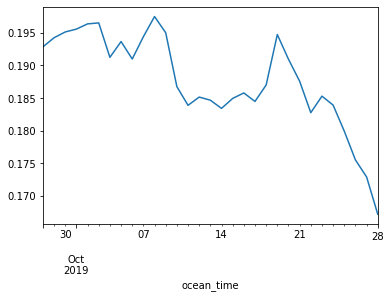

In [191]:
df.salt.plot()

<AxesSubplot:xlabel='ocean_time'>

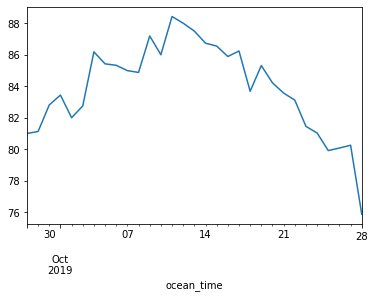

In [263]:
df['dist_mile'].plot()

AttributeError: 'DataFrame' object has no attribute 'ocean_time'

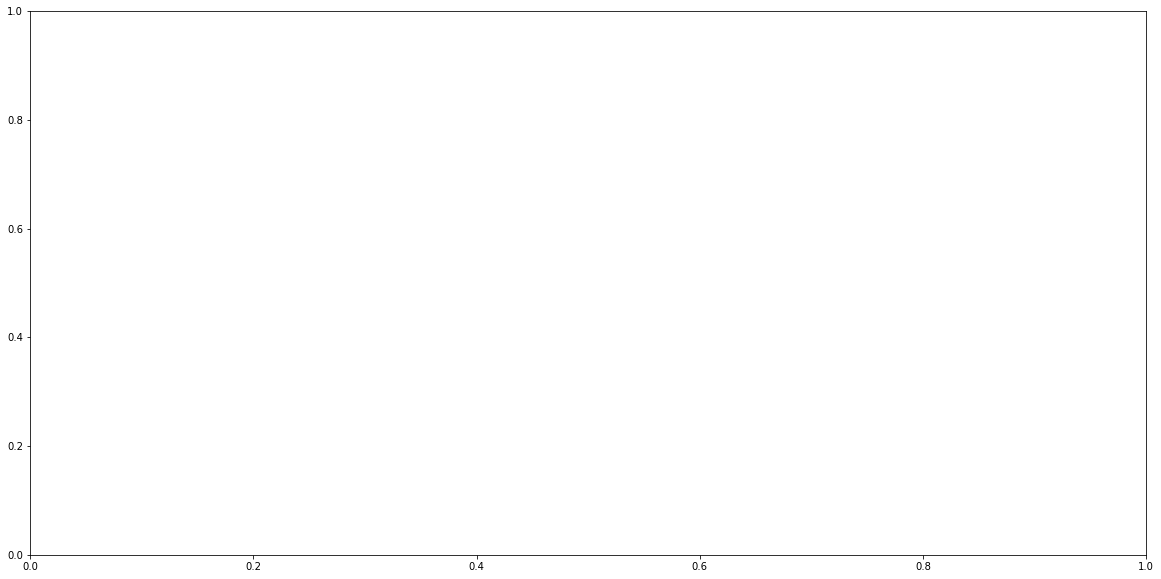

In [221]:
fig,ax1 = plt.subplots(figsize=(20,10))

im = df.plot(x=df.ocean_time,y=df.dist_mile)

ax1.set_xlabel('Days',fontsize=20)
ax1.set_ylabel('River Mile',fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylim([0, 110])
plt.grid()
plt.title("Hourly Salt Front August 2019",fontsize=20)
# plt.savefig('hourly_salt_front_aug_19.png', dpi=400)

In [116]:
df.resample('D').mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'MultiIndex'

In [ ]:
timestamps = salt.ocean_time
river_miles = salt.dist_miles
df = pd.DataFrame(index=pd.MultiIndex.from_product([timestamps, river_miles], names=['ts', 'cat']),
                  columns=['salinity'])

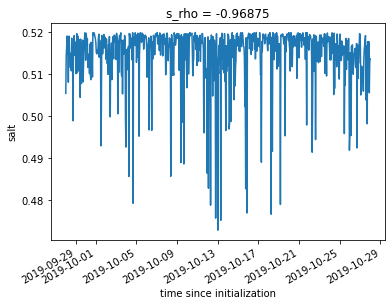

In [89]:
saltfront.salt.plot()

In [26]:
salt = salt.where(salt == saltfront)

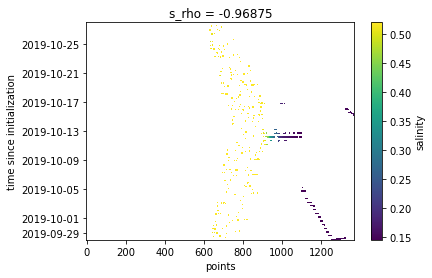

In [30]:
salt.salt.plot()

In [31]:
salt_daily = salt.resample(ocean_time='1D').mean()
salt_daily

<xarray.Dataset>
Dimensions:     (ocean_time: 31, points: 1370)
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 2019-09-28 2019-09-29 ... 2019-10-28
    s_rho       float64 -0.9688
    lon_rho     (points) float64 dask.array<chunksize=(1370,), meta=np.ndarray>
    lat_rho     (points) float64 dask.array<chunksize=(1370,), meta=np.ndarray>
    dist_mile   (points) float64 -6.864 -6.737 -6.609 ... 134.2 134.3 134.5
Dimensions without coordinates: points
Data variables:
    salt        (ocean_time, points) float32 dask.array<chunksize=(1, 1370), meta=np.ndarray>

In [74]:
salt_stack = salt_daily.to_stacked_array('river_miles', sample_dims=['ocean_time'], variable_dim=['points'], name='S')

TypeError: unhashable type: 'list'

In [67]:
salt_stack

<xarray.DataArray <xarray.Dataset>
Dimensions:     (ocean_time: 720, points: 1370)
Coordinates:
    s_rho       float64 -0.9688
    lon_rho     (points) float64 dask.array<chunksize=(1370,), meta=np.ndarray>
    lat_rho     (points) float64 dask.array<chunksize=(1370,), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 2019-09-28T01:00:00 ... 2019-10-28
    dist_mile   (points) float64 -6.864 -6.737 -6.609 ... 134.2 134.3 134.5
Dimensions without coordinates: points
Data variables:
    salt        (ocean_time, points) float32 dask.array<chunksize=(1, 1370), meta=np.ndarray> (ocean_time: 31, points: 1370, river_miles: 1)>
dask.array<transpose, shape=(31, 1370, 1), dtype=float32, chunksize=(1, 1370, 1), chunktype=numpy.ndarray>
Coordinates:
  * ocean_time   (ocean_time) datetime64[ns] 2019-09-28 ... 2019-10-28
    s_rho        float64 -0.9688
    lon_rho      (points) float64 dask.array<chunksize=(1370,), meta=np.ndarray>
    lat_rho      (points) float64 dask.array<chunksize=(1370,), meta=np.ndarray>
    dist_mile    (points) float64 -6.864 -6.737 -6.609 ... 134.2 134.3 134.5
  * river_miles  (river_miles) MultiIndex
  - salt         (river_miles) object 'salt'
Dimensions without coordinates: points

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

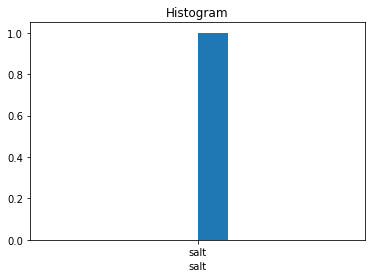

In [69]:
salt_stack.salt.plot()

In [632]:
salt_daily

<xarray.DataArray 'salt' (ocean_time: 31, points: 1370)>
dask.array<stack, shape=(31, 1370), dtype=float32, chunksize=(1, 1370), chunktype=numpy.ndarray>
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 2019-09-28 2019-09-29 ... 2019-10-28
    s_rho       float64 -0.9688
    lon_rho     (points) float64 dask.array<chunksize=(1370,), meta=np.ndarray>
    lat_rho     (points) float64 dask.array<chunksize=(1370,), meta=np.ndarray>
    dist_mile   (points) float64 -6.864 -6.737 -6.609 ... 134.2 134.3 134.5
Dimensions without coordinates: points

In [659]:
test = salt_daily.stack(river_mile=('ocean_time','points'))
test = test.unstack('river_mile').transpose('ocean_time','points')

In [660]:
test

<xarray.DataArray 'salt' (ocean_time: 31, points: 1370)>
dask.array<reshape, shape=(31, 1370), dtype=float32, chunksize=(1, 1370), chunktype=numpy.ndarray>
Coordinates:
    s_rho       float64 -0.9688
    lon_rho     (ocean_time, points) float64 dask.array<chunksize=(31, 1370), meta=np.ndarray>
    lat_rho     (ocean_time, points) float64 dask.array<chunksize=(31, 1370), meta=np.ndarray>
    dist_mile   (ocean_time, points) float64 -6.864 -6.737 ... 134.3 134.5
  * ocean_time  (ocean_time) datetime64[ns] 2019-09-28 2019-09-29 ... 2019-10-28
  * points      (points) int64 0 1 2 3 4 5 6 ... 1364 1365 1366 1367 1368 1369

In [630]:
test = salt_daily.roll('points')

ValueError: the first argument to .roll must be a dictionary

In [627]:
test

<xarray.DataArray 'salt' (river_mile: 42470)>
dask.array<reshape, shape=(42470,), dtype=float32, chunksize=(1370,), chunktype=numpy.ndarray>
Coordinates:
    s_rho       float64 -0.9688
    lon_rho     (river_mile) float64 dask.array<chunksize=(42470,), meta=np.ndarray>
    lat_rho     (river_mile) float64 dask.array<chunksize=(42470,), meta=np.ndarray>
    dist_mile   (river_mile) float64 -6.864 -6.737 -6.609 ... 134.2 134.3 134.5
  * river_mile  (river_mile) MultiIndex
  - ocean_time  (river_mile) datetime64[ns] 2019-09-28 2019-09-28 ... 2019-10-28
  - points      (river_mile) int64 0 1 2 3 4 5 ... 1364 1365 1366 1367 1368 1369

In [576]:
salt_daily.shape

(31, 1370)

In [546]:
saltfront_array = saltfront.values
saltfront_times_array = saltfront.time

array([       nan,        nan,        nan, ..., 0.153914  , 0.15394723,
              nan], dtype=float32)

KeyError: 'time'

In [518]:
# salt = salt.assign_coords({'dist_mile': dist_mile})
# salt = ds.isel(xi_rho=target_x,eta_rho=target_y, s_rho=0) 
# salt = salt.sortby(salt.dist_mile)
# salt = salt.salt.where(salt['salt'] == 0.52)
s_rho = ds['s_rho']
salt = ds['salt']
salt = salt.sel(s_rho=s_rho[0])
salt

<xarray.DataArray 'salt' (ocean_time: 720, eta_rho: 1370, xi_rho: 184)>
dask.array<getitem, shape=(720, 1370, 184), dtype=float32, chunksize=(1, 1370, 184), chunktype=numpy.ndarray>
Coordinates:
    s_rho       float64 -0.9688
    lon_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(1370, 184), meta=np.ndarray>
    lat_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(1370, 184), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 2019-09-28T01:00:00 ... 2019-10-28
Dimensions without coordinates: eta_rho, xi_rho
Attributes:
    long_name:  salinity
    time:       ocean_time
    grid:       grid
    location:   face
    field:      salinity, scalar, series

In [322]:
# salt = salt.isel(xi_rho=target_x,eta_rho=target_y)
# salt = salt.assign_coords({'dist_mile': dist_mile})

In [468]:
path = 'salt.nc'
ds_2 = xr.open_dataset(path, chunks={'ocean_time':1})
ds_2 = xr.Dataset(ds, coords={'dist_mile': dist_mile})
ds_2

<xarray.Dataset>
Dimensions:     (dist_mile: 13, eta_rho: 1370, ocean_time: 720, xi_rho: 184)
Coordinates:
    s_rho       float64 ...
    lon_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(1370, 184), meta=np.ndarray>
    lat_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(1370, 184), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 2019-09-28T01:00:00 ... 2019-10-28
  * dist_mile   (dist_mile) float64 0.1373 10.06 19.99 ... 97.41 110.0 120.0
Dimensions without coordinates: eta_rho, xi_rho
Data variables:
    salt        (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 1370, 184), meta=np.ndarray>

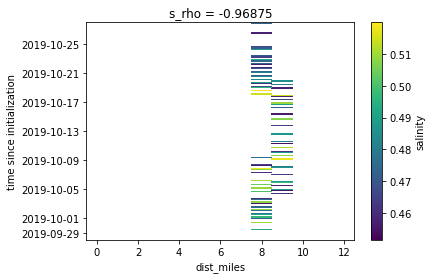

In [496]:
ds_2.salt.isel(xi_rho=target_x,eta_rho=target_y).plot()

Method #1

In [416]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

print(find_nearest(salt, 0.52))

[[      nan       nan       nan ... 30.493404 30.494942 30.494701]
 [      nan       nan       nan ... 30.493391 30.49465  30.494461]
 [      nan       nan       nan ... 30.494068 30.494843 30.495745]
 ...
 [      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]]


Method #2

In [427]:
filter_salt = []
for element in salt.values:
    # if element.any() == 0.52 or int(element.any()*10**5) == int(0.52*10**5):
    if element.any() < 0.52:
        filter_salt = filter_salt.append(salt.values)
filter_salt

[]

Method #3

In [429]:
from math import isclose
a = salt[0].values
b = 0.52
assert isclose(a, b, abs_tol=1e-8)

TypeError: only size-1 arrays can be converted to Python scalars

Method #4

In [520]:
# salt = salt.where(abs(salt-0.52)==abs(salt-0.52).min())
# salt = salt.where(abs(salt-0.52) <= 0.05)
saltfront = salt.where(salt < 0.52).where(salt > 0).max('ocean_time')
# salt = salt.groupby('ocean_time.day').mean('ocean_time')
salt = salt.where(salt == saltfront)
salt

<xarray.DataArray 'salt' (ocean_time: 720, eta_rho: 1370, xi_rho: 184)>
dask.array<where, shape=(720, 1370, 184), dtype=float32, chunksize=(1, 1370, 184), chunktype=numpy.ndarray>
Coordinates:
    s_rho       float64 -0.9688
    lon_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(1370, 184), meta=np.ndarray>
    lat_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(1370, 184), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 2019-09-28T01:00:00 ... 2019-10-28
Dimensions without coordinates: eta_rho, xi_rho
Attributes:
    long_name:  salinity
    time:       ocean_time
    grid:       grid
    location:   face
    field:      salinity, scalar, series

In [528]:
salt_plot = salt.isel(xi_rho=target_x,eta_rho=target_y)
salt_plot

<xarray.DataArray 'salt' (ocean_time: 720, dist_miles: 13)>
dask.array<transpose, shape=(720, 13), dtype=float32, chunksize=(1, 13), chunktype=numpy.ndarray>
Coordinates:
    s_rho       float64 -0.9688
    lon_rho     (dist_miles) float64 dask.array<chunksize=(13,), meta=np.ndarray>
    lat_rho     (dist_miles) float64 dask.array<chunksize=(13,), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 2019-09-28T01:00:00 ... 2019-10-28
Dimensions without coordinates: dist_miles
Attributes:
    long_name:  salinity
    time:       ocean_time
    grid:       grid
    location:   face
    field:      salinity, scalar, series

Text(0.5, 1.0, 'Hourly Salt Front August 2019')

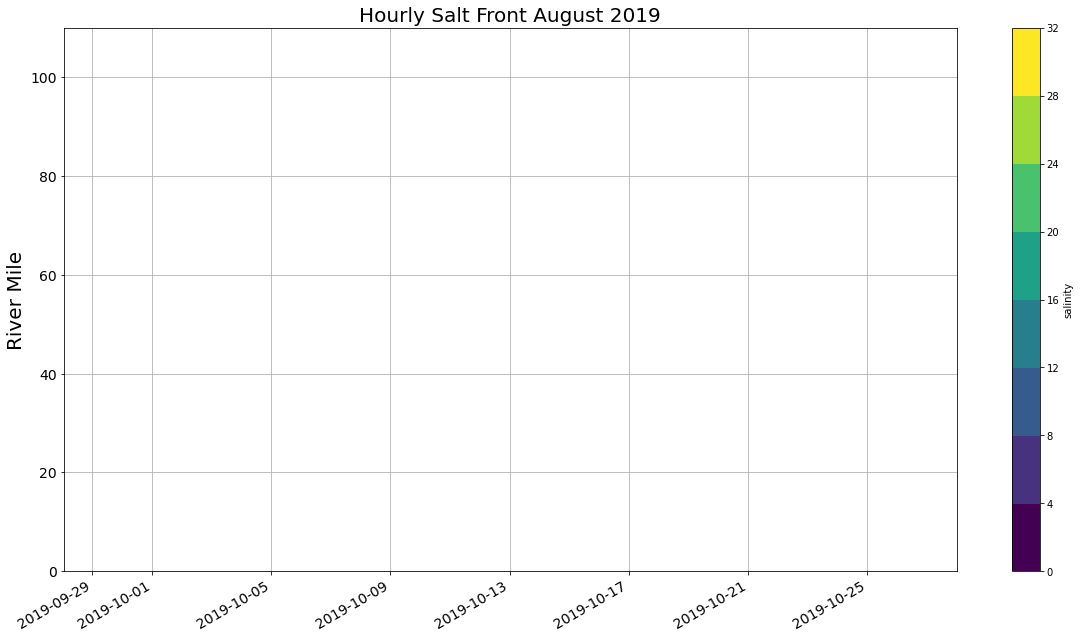

In [530]:
fig,ax1 = plt.subplots(figsize=(20,10))

im = salt_plot.plot.contourf(x='ocean_time',y='dist_miles',add_colorbar=True,
                         vmin=0,vmax=32,levels=9)

ax1.set_xlabel('',fontsize=20)
ax1.set_ylabel('River Mile',fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylim([0, 110])
plt.grid()
plt.title("Hourly Salt Front August 2019",fontsize=20)

In [461]:
os.getcwd()

'C:\\Users\\tthompson\\Documents\\Projects\\Estaury-Salt_Front\\fetch\\drb-estuary-salinity-ml'

In [361]:
xr.slice?

Object `xr.slice` not found.


In [438]:
salt = salt.groupby('ocean_time.day').mean('ocean_time')

In [455]:
salt.plot.scatter('dist_mile', 'ocean_time', 'salt')

AttributeError: '_PlotMethods' object has no attribute 'scatter'

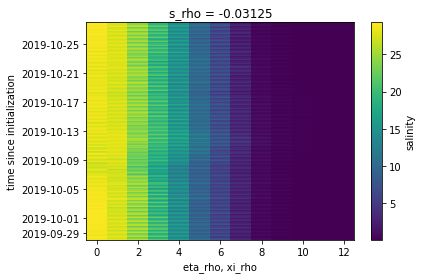

In [243]:
salt.plot()

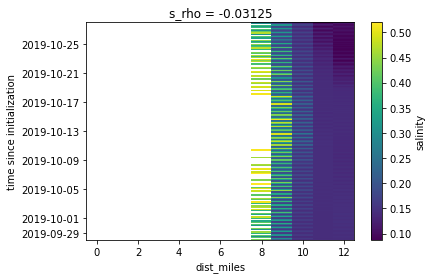

In [299]:
salt.where(salt < 0.52).plot()

In [ ]:
salt = salt.assign_coords({'dist_mile': dist_mile})
print(f'Size: {ds.nbytes / (-10**9)} GB')
salt

In [ ]:
salt = salt.where(salt>0.5)
salt = salt.isel(s_rho=0)
print(f'Size: {salt.nbytes / (10**9)} GB')
# salt.to_netcdf('salt_2019.nc')
salt

In [ ]:
salt = salt.assign_coords({'dist_mile': dist_mile})
print(f'Size: {ds.nbytes / (-10**9)} GB')
salt

# Local Dataset of Salt

In [73]:
os.getcwd()

'C:\\Users\\tthompson\\Documents\\Projects\\Estaury-Salt_Front\\fetch\\drb-estuary-salinity-ml'

In [444]:
datadir = '/Users/tthompson/Documents/Projects/Estaury-Salt_Front/fetch/drb-estuary-salinity-ml/salt_2019.nc'
salt_local = xr.open_dataset(datadir, chunks={'ocean_time':1})
salt_local

<xarray.Dataset>
Dimensions:     (ocean_time: 720, points: 13)
Coordinates:
    s_rho       float64 ...
    lon_rho     (points) float64 dask.array<chunksize=(13,), meta=np.ndarray>
    lat_rho     (points) float64 dask.array<chunksize=(13,), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 2019-09-28T01:00:00 ... 2019-10-28
    dist_mile   (points) float64 dask.array<chunksize=(13,), meta=np.ndarray>
Dimensions without coordinates: points
Data variables:
    salt        (ocean_time, points) float32 dask.array<chunksize=(1, 13), meta=np.ndarray>

In [445]:
salt_local = salt_local.where(salt_local < 0.52).where(salt_local > 0.45)
salt_local

<xarray.Dataset>
Dimensions:     (ocean_time: 720, points: 13)
Coordinates:
    s_rho       float64 -0.9688
    lon_rho     (points) float64 dask.array<chunksize=(13,), meta=np.ndarray>
    lat_rho     (points) float64 dask.array<chunksize=(13,), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 2019-09-28T01:00:00 ... 2019-10-28
    dist_mile   (points) float64 dask.array<chunksize=(13,), meta=np.ndarray>
Dimensions without coordinates: points
Data variables:
    salt        (ocean_time, points) float32 dask.array<chunksize=(1, 13), meta=np.ndarray>

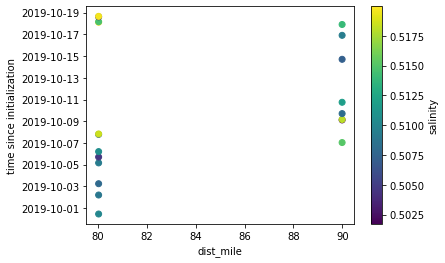

In [448]:
salt_local.plot.scatter('dist_mile', 'ocean_time', 'salt')

In [451]:
salt_front

<xarray.DataArray 'salt' (day: 30, points: 13)>
dask.array<stack, shape=(30, 13), dtype=float32, chunksize=(1, 13), chunktype=numpy.ndarray>
Coordinates:
    s_rho      float64 -0.9688
    lon_rho    (points) float64 dask.array<chunksize=(13,), meta=np.ndarray>
    lat_rho    (points) float64 dask.array<chunksize=(13,), meta=np.ndarray>
    dist_mile  (points) float64 dask.array<chunksize=(13,), meta=np.ndarray>
  * day        (day) int64 1 2 3 4 5 6 7 8 9 10 ... 22 23 24 25 26 27 28 29 30
Dimensions without coordinates: points

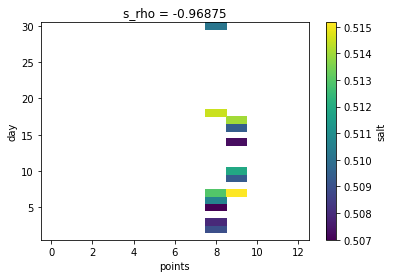

In [453]:
salt_front.plot()

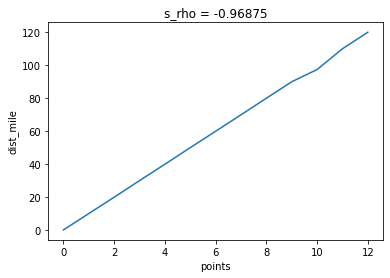

In [309]:
salt_front = salt_local.salt.where(salt_local.salt < 0.52)
salt_front = salt_front.groupby('ocean_time.day').mean('ocean_time')
salt_front.dist_mile.plot()

In [92]:
salt_local.salt[0].shape

(13,)

In [164]:
salt_local.salt[5].values

array([28.917908 , 27.417273 , 25.084976 , 21.38282  , 16.936974 ,
       12.175513 ,  7.9686527,  4.804931 ,  1.441012 ,        nan,
              nan,        nan,        nan], dtype=float32)

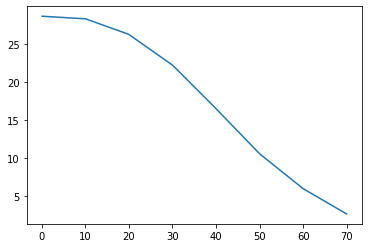

In [93]:
plt.plot(salt_local.dist_mile, salt_local.salt[0])

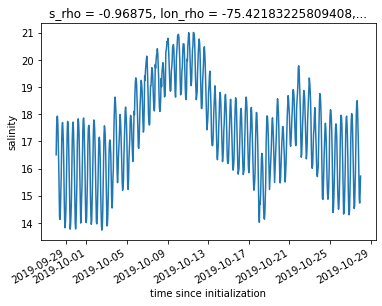

In [96]:
salt_local.salt.isel(points=4).plot()

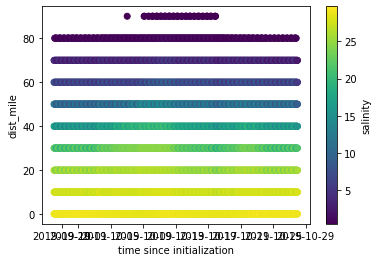

In [109]:
salt_local.plot.scatter('ocean_time','dist_mile','salt')

Text(0.5, 1.0, 'Hourly Salt Front August 2019')

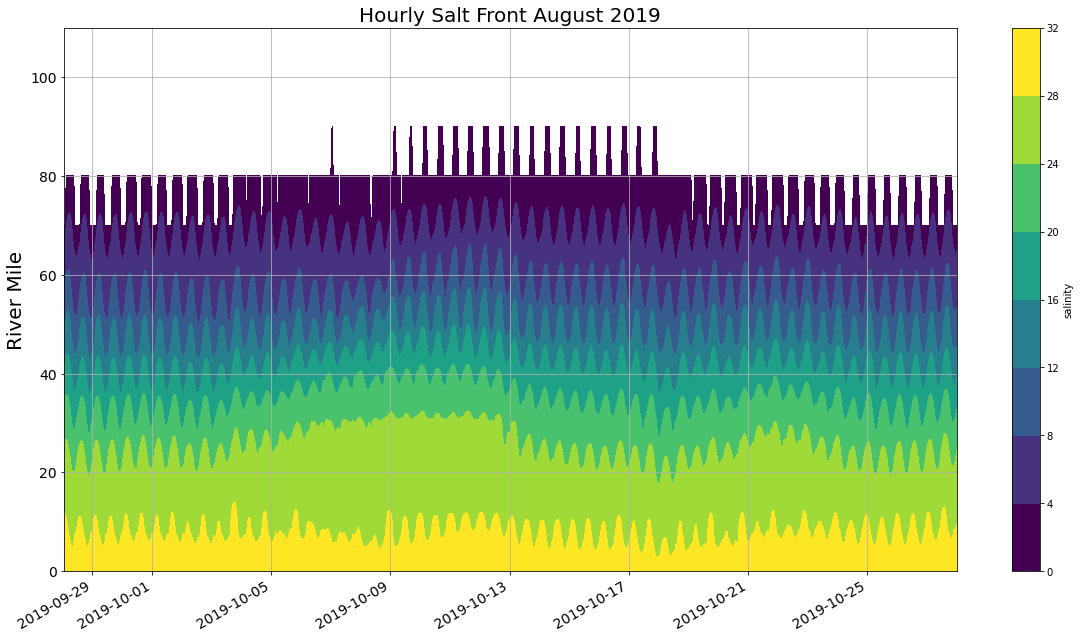

In [144]:
fig,ax1 = plt.subplots(figsize=(20,10))

im = salt_local.salt.plot.contourf(x='ocean_time',y='dist_mile',add_colorbar=True,
                         vmin=0,vmax=32,levels=9)

ax1.set_xlabel('',fontsize=20)
ax1.set_ylabel('River Mile',fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylim([0, 110])
plt.grid()
plt.title("Hourly Salt Front August 2019",fontsize=20)

### Calculate Salt Front

In [115]:
salt_local.salt.where(salt_local.salt < 0.5).values

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [10]:
salt_local2 = salt_local.groupby('ocean_time.day').mean('ocean_time')
salt_local2

<xarray.Dataset>
Dimensions:    (day: 30, points: 13)
Coordinates:
    s_rho      float64 ...
    lon_rho    (points) float64 dask.array<chunksize=(13,), meta=np.ndarray>
    lat_rho    (points) float64 dask.array<chunksize=(13,), meta=np.ndarray>
    dist_mile  (points) float64 dask.array<chunksize=(13,), meta=np.ndarray>
  * day        (day) int64 1 2 3 4 5 6 7 8 9 10 ... 22 23 24 25 26 27 28 29 30
Dimensions without coordinates: points
Data variables:
    salt       (day, points) float32 dask.array<chunksize=(1, 13), meta=np.ndarray>

In [13]:
os.getcwd()

'C:\\Users\\tthompson\\Documents\\Projects\\Estaury-Salt_Front\\fetch\\drb-estuary-salinity-ml'

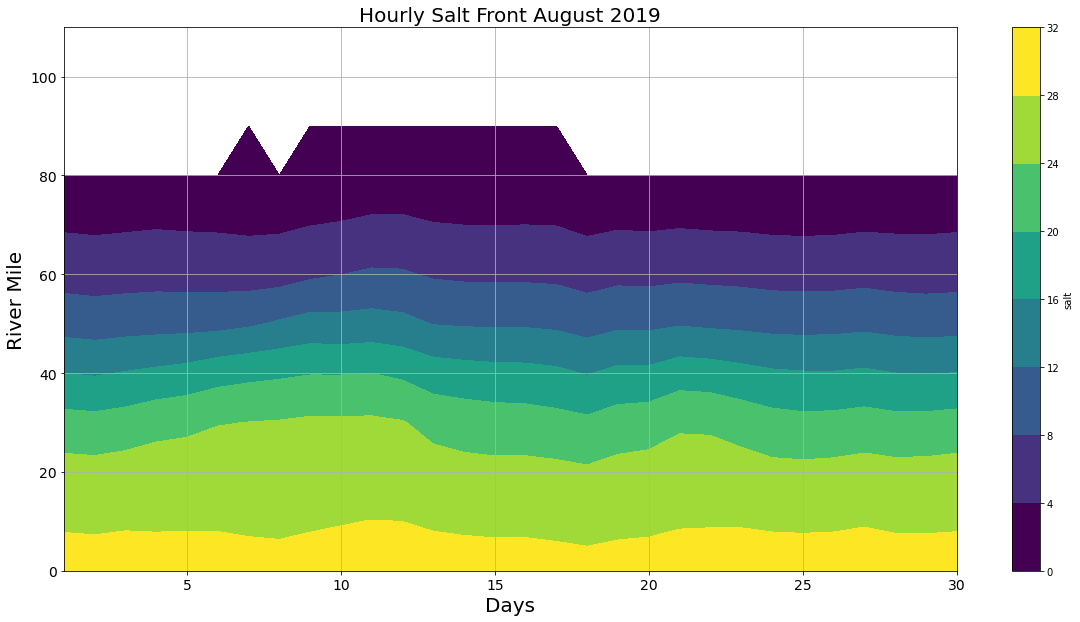

In [14]:
fig,ax1 = plt.subplots(figsize=(20,10))

im = salt_local2.salt.plot.contourf(x='day',y='dist_mile',add_colorbar=True,
                         vmin=0,vmax=32,levels=9)

ax1.set_xlabel('Days',fontsize=20)
ax1.set_ylabel('River Mile',fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylim([0, 110])
plt.grid()
plt.title("Hourly Salt Front August 2019",fontsize=20)
plt.savefig('hourly_salt_front_aug_19.png', dpi=400)

In [49]:
salt_local = salt_local.fillna(0)

In [85]:
salt_front = salt_local.where(salt_local.salt < 1)

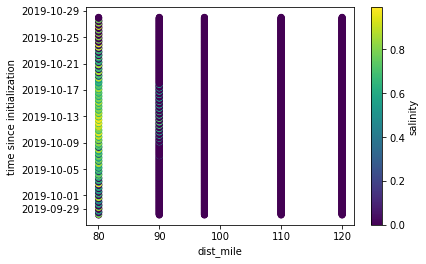

In [90]:
salt_front.plot.scatter('dist_mile', 'ocean_time', 'salt')

In [92]:
salt_front

<xarray.Dataset>
Dimensions:     (ocean_time: 720, points: 13)
Coordinates:
    s_rho       float64 -0.9688
    lon_rho     (points) float64 dask.array<chunksize=(13,), meta=np.ndarray>
    lat_rho     (points) float64 dask.array<chunksize=(13,), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 2019-09-28T01:00:00 ... 2019-10-28
    dist_mile   (points) float64 dask.array<chunksize=(13,), meta=np.ndarray>
Dimensions without coordinates: points
Data variables:
    salt        (ocean_time, points) float32 dask.array<chunksize=(1, 13), meta=np.ndarray>

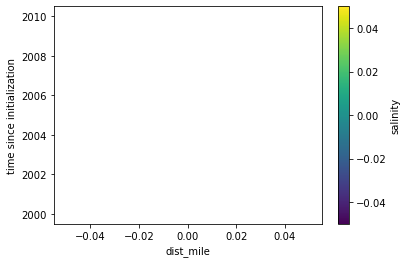

In [104]:
salt_front.where(salt_front.dist_mile == 90).plot.scatter('dist_mile', 'ocean_time', 'salt')

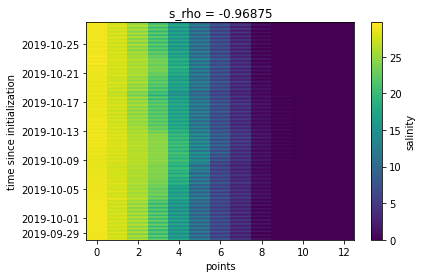

In [67]:
salt_local.salt.plot()

In [ ]:
salt_local.where(salt_local.values

In [ ]:
fig,ax1 = plt.subplots(figsize=(20,10))

im = salt_local.plot.contourf(x,y,add_colorbar=True,
                         vmin=0,vmax=32,levels=9)

ax1.set_xlabel('',fontsize=20)
ax1.set_ylabel('River Mile',fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylim([0, 110])
plt.grid()
plt.title("Hourly Salt Front August 2019",fontsize=20)

In [ ]:
fig = plt.figure(figsize=(14.0,7.0))

axes1 = fig.add_subplot(1, 1, 1)

pc1 = axes1.pcolormesh(x, y, salt.values)
contours = axes1.contour(x, y, salt.values, colors='w')
axes1.clabel(contours, inline=2, fontsize=8)
plt.colorbar(pc1, ax=axes1)
axes1.set_ylabel('Lattitude')
axes1.set_xlabel('Longitude')
axes1.title.set_text('Salinity in DRB')
# plt.savefig('. DRB Salinity')

In [300]:
salt = salt.sortby(dist_mile)
salt = salt.where(salt>0.5)
print(f'Size: {salt.nbytes / (-10**9)} GB')
salt

Size: -3.744e-05 GB


<xarray.DataArray 'salt' (ocean_time: 720, points: 13)>
dask.array<where, shape=(720, 13), dtype=float32, chunksize=(1, 13), chunktype=numpy.ndarray>
Coordinates:
    s_rho       float64 -0.9688
    lon_rho     (points) float64 dask.array<chunksize=(13,), meta=np.ndarray>
    lat_rho     (points) float64 dask.array<chunksize=(13,), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 2019-09-28T01:00:00 ... 2019-10-28
    dist_mile   (points) float64 0.1373 10.06 19.99 30.05 ... 97.41 110.0 120.0
Dimensions without coordinates: points
Attributes:
    long_name:  salinity
    time:       ocean_time
    grid:       grid
    location:   face
    field:      salinity, scalar, series

In [ ]:
fig,ax1 = plt.subplots(figsize=(20,10))

im = plt.contourf(x=salt_local.ocean_time, y=salt_local.dist_mile, add_colorbar=True,
                         vmin=0,vmax=32,levels=9)

ax1.set_xlabel('',fontsize=20)
ax1.set_ylabel('River Mile',fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylim([0, 110])
plt.grid()
# plt.title("Hourly Salt Front August 2019",fontsize=20)

In [16]:
salt_local.dist_mile.values

array([  0.13734282,  10.06138569,  19.99142973,  30.05164758,
        39.97499267,  50.03700363,  59.97409988,  69.94775044,
        80.02412913,  89.99216472,  97.40694267, 110.00602579,
       120.02520124])

In [ ]:
fig,ax1 = plt.subplots(figsize=(20,10))

im = plt.contourf(x=salt_local.ocean_time.values,y=salt_local.dist_mile.values, z=salt_local.salt.values, add_colorbar=True,
                         vmin=0,vmax=32,levels=9,cmap=cm.cm.haline)

plt.plot(ds['ocean_time'],np.ones((8473,))*67,color='red',linestyle='dashed')
plt.plot(ds['ocean_time'],np.ones((8473,))*76,color='red',linestyle='dashed')
plt.plot(ds['ocean_time'],np.ones((8473,))*55,color='red',linestyle='dashed')
plt.plot(ds['ocean_time'],np.ones((8473,))*60,color='red',linestyle='dashed')
plt.plot(ds['ocean_time'],np.ones((8473,))*84,color='red',linestyle='dashed')
plt.plot(ds['ocean_time'],np.ones((8473,))*87,color='red',linestyle='dashed')

ax1.set_xlabel('',fontsize=20)
ax1.set_ylabel('River Mile',fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylim([0, 110])
plt.grid()
plt.title("Hourly Salt Front August 2019",fontsize=20)

In [88]:
salt_local['ocean_time'].shape

(720,)

In [91]:
# plt.contourf(salt_local.ocean_time, salt_local.dist_mile, add_colorbar=True,
#                          vmin=0,vmax=32,levels=9,cmap=cm.cm.haline)
salt_local.plot.contourf(salt_local.ocean_time, salt_local.dist_mile, salt_local.salt)

TypeError: unhashable type: 'DataArray'

In [74]:
s

TypeError: __call__() takes 1 positional argument but 2 were given